# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Bowler\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
clean_hospital_read_df.sort_values('Number of Discharges', ascending=False).head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013


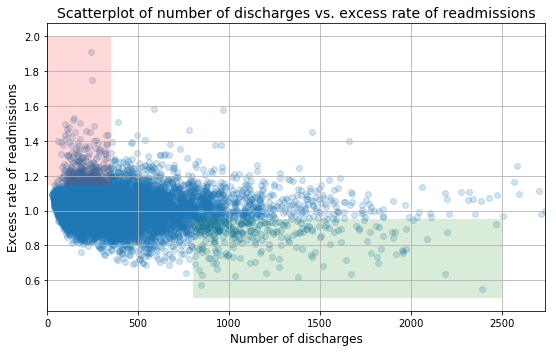

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

It's unclear from the initial scatterplot if there is a linear realtionship between number of discharges and excess readmission rates, or the strength of this relationship.

An initial analysis should provide the descriptive statistics for the linear regression underlying the scatterplot.

Distribution plots of the two variables follow.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

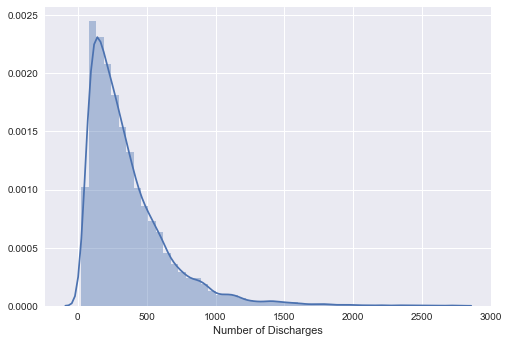

In [6]:
import seaborn as sns
sns.distplot(clean_hospital_read_df['Number of Discharges'][81:-3])

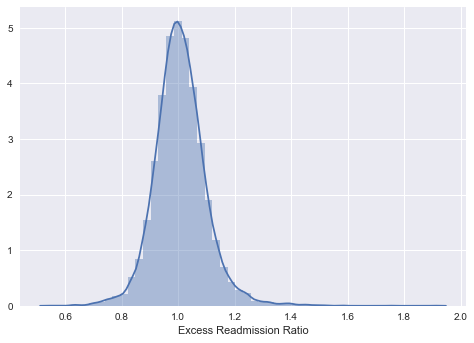

In [7]:
sns.distplot(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

The 'Number of Discharges' appears to be lognormal, so this variable will be transformed in the initial regression analysis.

In [8]:
from sklearn import linear_model
x_t = np.array(x)
y_t = np.array(y)

x_t = x_t.reshape(len(x), 1)
y_t = y_t.reshape(len(y), 1)

regr = linear_model.LinearRegression()

regr.fit(np.log(x_t), y_t)

# Regression parameters
print('Coefficient: ', regr.coef_[0])
print('Intercept: ', regr.intercept_[0])
print('R-squared: ', regr.score(np.log(x_t), y_t))

Coefficient:  [-0.01156385]
Intercept:  1.07245308611
R-squared:  0.00927586860981


#### 5. Construct another plot that conveys the same information in a more direct manner.

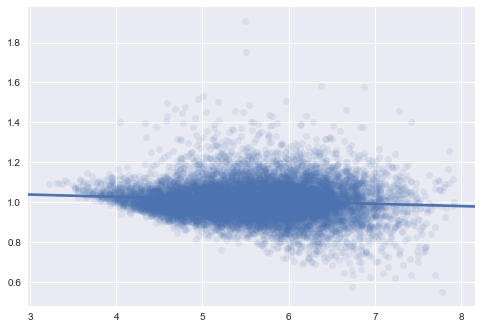

In [9]:
sns.regplot(np.array(np.log(x)), np.array(y), scatter_kws={'alpha':0.1})

#### Original Analysis Finding
From the regression output and as visualized in the accompanying graph, the regression model does a poor job explaining the variablity of the data.  The regression coefficient indicates a weak negative relationship between number of discharges and excess readmission rates.  Furthermore, the R-squared is very low (~ 0.0092), indicating that almost all of the variance of the dependent variable (excess readmission rate) is not explained by the number of discharges.

#### 1. Setup an appropriate hypothesis test.
A more appropriate test would involve splitting the data into distinct groups based on the number of discharges as a proxy for hospital size, and testing whether there are statistically significant differences in excess readmission rates among the groups.

* Null Hypothesis: There is no difference in mean Excess Readmission Ratio between small (< 300 discharges), medium (300 - 1000 discharges) and large (> 1000 discharges) hospitals.
* Alternative Hypothesis: There are statistically significant differences in mean Excess Readmission Ration between the three groups.

One-way ANOVA (analysis of variance) is an appropriate test given that the data is subsetted into 3 categorical factor groups (discharge levels as a proxy for the 'size' category) and we're testing the means of a variable (e.g. Excess Readmission Ratio) differs between the groups.

#### 2. Compute and report the observed significance value (or p-value).

In [10]:
# Subsetting data and creating categorical variable 'Group'
df = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]
low = df[df['Number of Discharges'] < 300]
mid = df[(df['Number of Discharges'] <= 1000) & (df['Number of Discharges'] >= 300)]
high = df[df['Number of Discharges'] > 1000]

low.insert(loc=len(low.columns), column='Group', value='Low')
mid.insert(loc=len(mid.columns), column='Group', value='Mid')
high.insert(loc=len(high.columns), column='Group', value='High')

# Renaming 'Excess Readmission Ratio' column so it can be used in the StatsModel OLS (ordinary least squares) model
df = pd.concat([low, mid, high])
df.rename(columns={'Excess Readmission Ratio': 'Excess_Readmit'}, inplace=True)
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess_Readmit,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Group
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013,Low
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013,Low
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013,Low
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013,Low
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013,Low


The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.
1. The samples are independent.
2. Each sample is from a normally distributed population.
3. The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

Distribution plots of the three groups' Excess Readmission Ratio seem to support that this variable displays near-normal distributions in the groups.

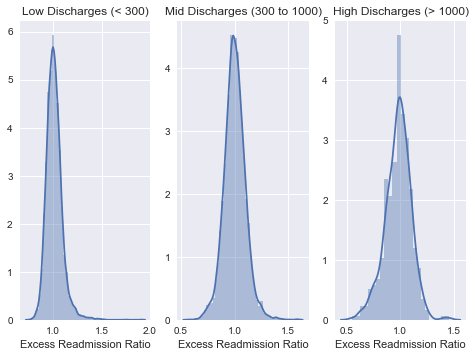

In [11]:
fig, axs = plt.subplots(ncols=3)
plt.figure(figsize=(50, 25))

sns.distplot(low['Excess Readmission Ratio'], ax=axs[0]).set_title('Low Discharges (< 300)')
sns.distplot(mid['Excess Readmission Ratio'], ax=axs[1]).set_title('Mid Discharges (300 to 1000)')
sns.distplot(high['Excess Readmission Ratio'], ax=axs[2]).set_title('High Discharges (> 1000)')

#### 3. Report statistical significance for α = .01. 

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Excess_Readmit ~ Group', data=df).fit()

anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)

             sum_sq       df          F        PR(>F)
Group      0.825896      2.0  49.236403  5.104813e-22
Residual  96.400676  11494.0        NaN           NaN


The p-value from the ANOVA test is well below 1%, indicating that the null hypothesis (no difference in Excess Readmission Rates among the three groups) can be rejected, and that there is a likely statistically significant difference in Excess Readmissions by group size, not attributable to chance.

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The statistical significance from the ANOVA test supports the client's original conclusion that smaller hospitals have a higher incidence of Excess Readmissions, but utilizes a more appropriate test to support the claim.  The additional, confirming analysis needed to be carried out to corroborate the original client finding.